# **Self-Organizing Map (SOM)**

## Introduction

Self-Organizing Maps (SOM) are a type of artificial neural network used for unsupervised learning, particularly for clustering and visualization of high-dimensional data. SOMs are capable of mapping high-dimensional input data into lower-dimensional (typically two-dimensional) grids while preserving the topological relationships of the data.

## Overview of Self-Organizing Maps

### Key Components

1. **Neurons**: Each node in the map is called a neuron. Each neuron has weights associated with it that are initialized randomly or based on the input data.

2. **Input Data**: The high-dimensional data points that will be clustered and visualized.

3. **Topology**: SOMs typically use a two-dimensional grid structure, where neurons are arranged in a hexagonal or rectangular lattice.

### Basic Concepts

- **Winner Takes All (WTA)**: For each input data point, the neuron with the closest weight vector (based on a distance metric, usually Euclidean distance) is identified as the "winning neuron."

- **Neighborhood Function**: This function determines the influence of the winning neuron on its neighboring neurons. The influence decreases with distance from the winning neuron.

- **Weight Update Rule**: The weights of the winning neuron and its neighbors are adjusted to become more similar to the input data point. This adjustment is governed by a learning rate and the neighborhood function.

## How Self-Organizing Maps Work

### Training Algorithm

1. **Initialization**:
   - Initialize the weight vectors of the neurons randomly or based on the input data.

2. **Input Presentation**:
   - For each input vector in the dataset:
     - Calculate the distance to each neuron’s weight vector.
     - Identify the winning neuron (the one with the smallest distance).

3. **Weight Update**:
   - Update the weights of the winning neuron and its neighbors:
   $$
   w_{ij}(t+1) = w_{ij}(t) + \alpha(t) \cdot h_{c,j}(t) \cdot (x(t) - w_{ij}(t))
   $$
   Where:
   - \( w_{ij}(t) \) is the weight vector of the neuron at position \( (i,j) \) at time \( t \).
   - \( \alpha(t) \) is the learning rate, which decreases over time.
   - \( h_{c,j}(t) \) is the neighborhood function, which determines the strength of the update based on the distance from the winning neuron.
   - \( x(t) \) is the input vector at time \( t \).

4. **Iteration**:
   - Repeat the input presentation and weight update steps for a predetermined number of epochs or until convergence.

### Visualization

After training, SOMs can be visualized in various ways, such as:
- **U-Matrix**: A distance matrix that shows the average distance between neurons, where darker areas indicate closer neurons (more similar data).
- **Component Planes**: Visual representations of the weights of individual neurons for each feature.

## Advantages of Self-Organizing Maps

- **Dimensionality Reduction**: SOMs effectively reduce high-dimensional data to lower dimensions, making it easier to visualize and interpret.
- **Non-linear Relationships**: Unlike linear techniques (e.g., PCA), SOMs can capture complex non-linear relationships in the data.
- **Topological Preservation**: SOMs maintain the topological relationships of the data, meaning similar data points are mapped close together in the output space.

## Limitations of Self-Organizing Maps

- **Training Complexity**: SOMs can be computationally intensive and may require significant training time, especially for large datasets.
- **Parameter Sensitivity**: The performance of SOMs can be sensitive to the choice of parameters, such as learning rate, neighborhood size, and initialization.
- **Interpretability**: While SOMs provide visualizations, interpreting the exact meaning of clusters can still be challenging.

## Applications of Self-Organizing Maps

- **Data Visualization**: SOMs are commonly used for visualizing high-dimensional datasets, such as customer behavior data or gene expression profiles.
- **Clustering**: They can effectively cluster data in fields like finance, biology, and image processing.
- **Feature Extraction**: SOMs can be used for feature extraction in machine learning pipelines.

## Summary

Self-Organizing Maps are a powerful tool for clustering and visualizing high-dimensional data. By preserving the topological relationships of the data, SOMs allow for meaningful insights and interpretations of complex datasets. Understanding and implementing SOMs can enhance exploratory data analysis and help in the development of more sophisticated machine learning models.

## **Load Libraries and Data**

In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data

## **Normalize the Data and Initialize the SOM**

In [2]:
# Normalize the data
data = data / data.max(axis=0)

# Initialize the SOM
map_size = (10, 10)  # Size of the SOM grid
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

# initiate the weights of the neurons SOM with random values
som.random_weights_init(data)

## **Train the SOM**

In [3]:
# Train the SOM
num_epochs = 1000
som.train_random(data, num_epochs)

## **Visualize the SOM**

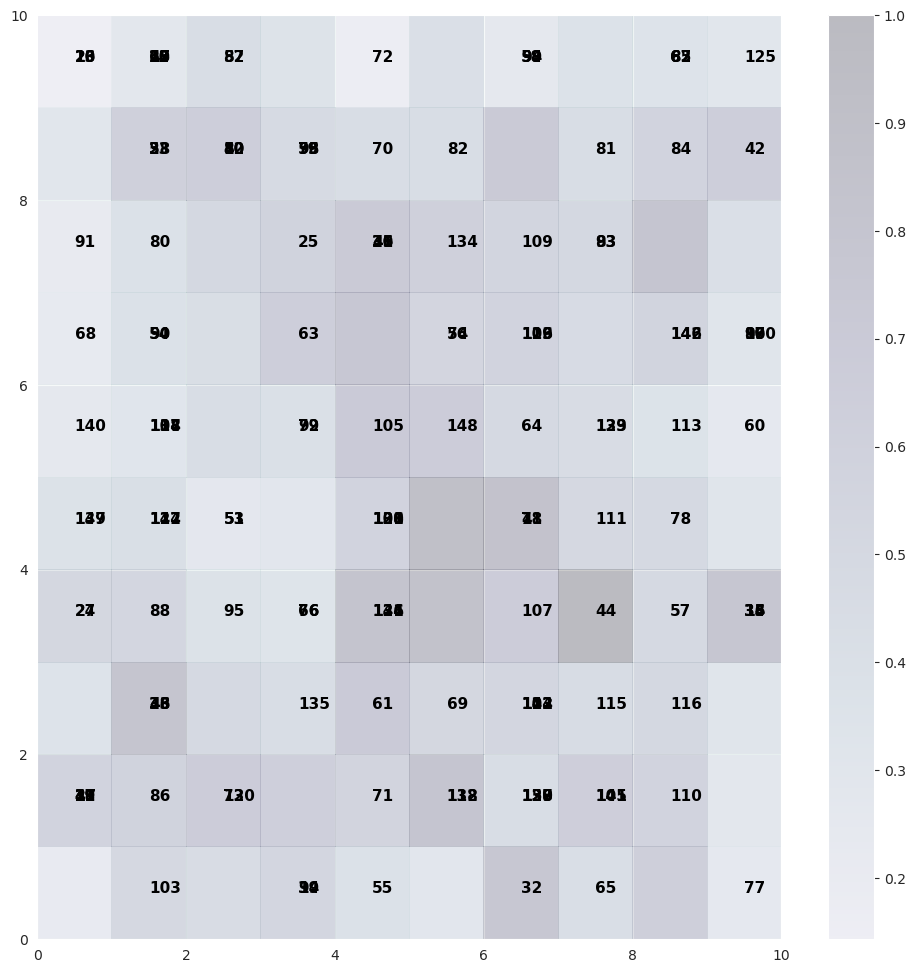

In [8]:
# Visualisasi hasil SOM
plt.figure(figsize=(12, 12))
for i, x in enumerate(data):
    w = som.winner(x)  # Get the winner neuron for each data point
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()